In [1]:
from benchmark import *
%matplotlib inline
mcss = '../../../mcss_sizes.pkl'

In [2]:
def results(data, helpers, alpha, method, features, ligs, aggregrate):
    ligand = data.xs((helpers, method, ligs, features, alpha),
                      level=('helpers', 'mode', 'n_ligs', 'features', 'alpha')).filter(regex='rmsd|correct')
    target = ligand.groupby(level=list(range(len(ligand.index.levels)-1))).mean().dropna()
    print(ligand.shape[0])
    if aggregate == 'target':
        family = target.groupby(level=list(range(len(target.index.levels)-1))).mean()
    elif aggregate == 'ligand':
        family = ligand.groupby(level=list(range(len(ligand.index.levels)-2))).mean()
    perf = drug_average(family)
    return perf['glide_correct'][0], perf['combind_correct'][0]

def sweep(helpers,
          ligs = [1, 3, 5, 10, 15, 20],
          alphas = [0.5, 0.75, 1.0, 1.25, 1.5],
          features = ['mcss_contact_hbond_sb', 'mcss',
                      'contact_hbond_sb', 'mcss_hbond_sb', 'mcss_contact_sb', 'mcss_contact_hbond'],
          methods=['crystal', 'only_crystal', 'standard']):
    data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
    data = add_correct(data, thresh = 2.0)
    data = data[  (data.index.get_level_values('protein') != 'A2AR')
                & (data.index.get_level_values('protein') != 'VDR')
                & (data.index.get_level_values('protein') != 'MAPK14')]
    data = data[data.mcss < 0.5]
    #data = data[data.best_correct]
    
    # Alpha v. # ligands
    for method in methods:
        for alpha in alphas:
            combind, glide = [], []
            for lig in ligs:
                g, c = results(data, helpers, alpha, method, features[0], lig)
                combind += [c]
                glide += [g]

            plt.plot(ligs, combind, label=alpha)
            plt.plot(ligs, glide)
        plt.legend()
        plt.xlabel('# of ligands')
        plt.title('{}-{}'.format(helpers, method))
        plt.show()
        
    # # ligands v. alpha
    for method in methods:
        for lig in ligs:
            combind, glide = [], []
            for alpha in alphas:
                g, c = results(data, helpers, alpha, method, features[0], lig)
                combind += [c]
                glide += [g]

            plt.plot(alphas, combind, label=lig)
            plt.plot(alphas, glide)
        plt.legend()
        plt.xlabel('alpha')
        plt.title('{}-{}'.format(helpers, method))
        plt.show()

    # Features
    for method in methods:
        combind, glide = [], []
        for feature in features:
            g, c = results(data, helpers, 1.0, method, feature, ligs[-1])
            combind += [c]
            glide += [g]

        plt.plot(combind, label = method)
        plt.plot(glide)
    plt.xticks(range(len(features)), features, rotation = 'vertical')
    plt.legend()
    plt.show()

387
387
387
387
387


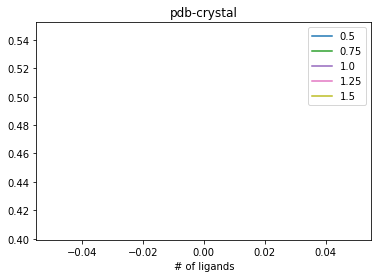

387
387
387
387
387


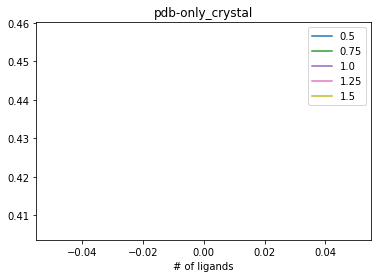

387
387
387
387
387


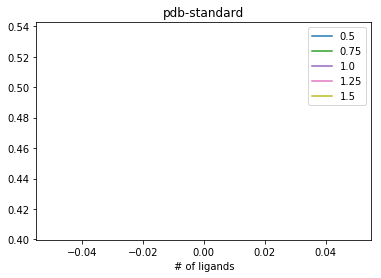

387
387
387
387
387


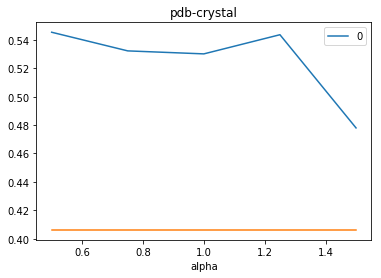

387
387
387
387
387


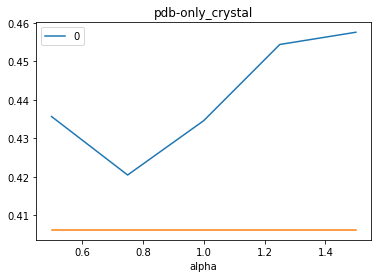

387
387
387
387
387


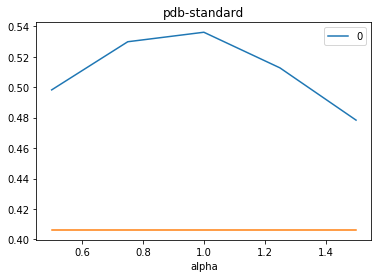

387
774
387
387
387
387
387
774
387
387
387
387
387
774
387
387
387
387


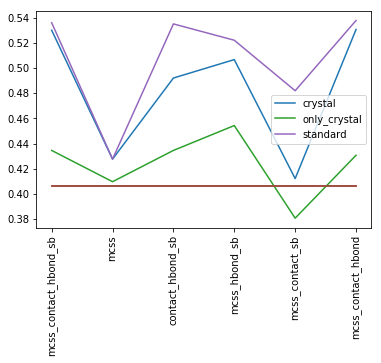

In [3]:
sweep('pdb', ligs=[0])

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


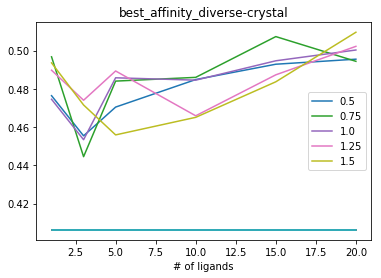

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


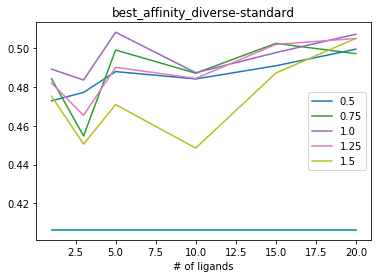

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


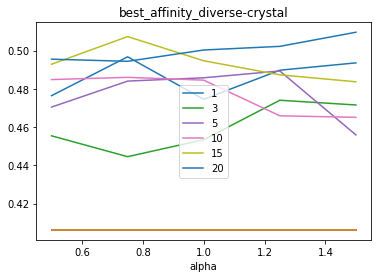

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


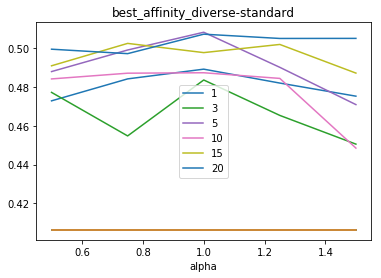

387
387
387
387
383
387
387
387
387
387
387
385


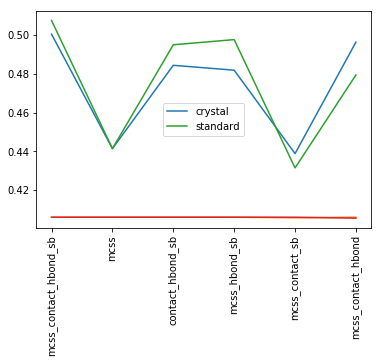

In [4]:
sweep('best_affinity_diverse', methods=['crystal', 'standard'])

382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
387
382
382
382
382
382
382
382
382
382
382
382
382


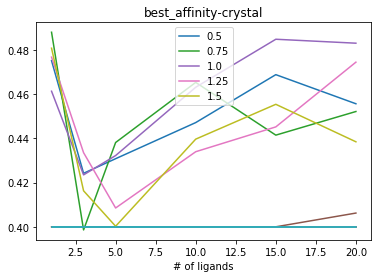

382
382
382
382
382
382
382
382
382
382
382
378
382
382
382
382
382
387
382
382
382
382
382
382
382
382
382
382
382
382


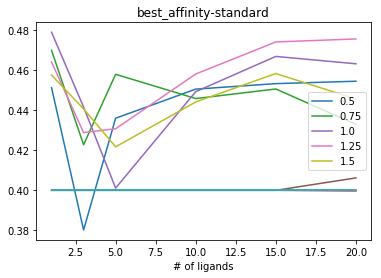

382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
387
382
382


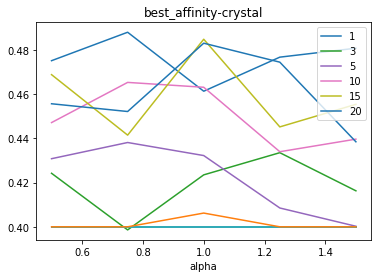

382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
378
387
382
382


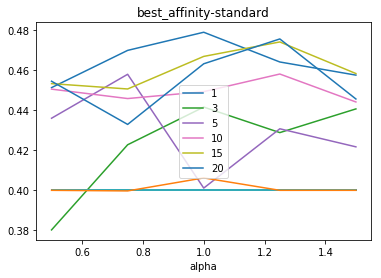

387
387
387
387
387
387
387
387
387
387
387
387


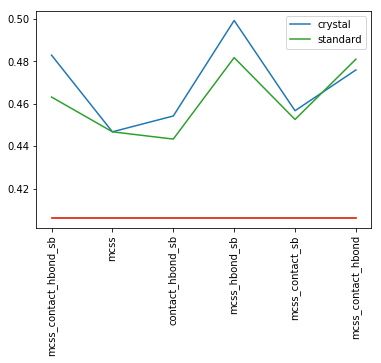

In [5]:
sweep('best_affinity', methods=['crystal', 'standard'])

387
387
387
387
387
387
387
387
387
387
387
387
387
387
380
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


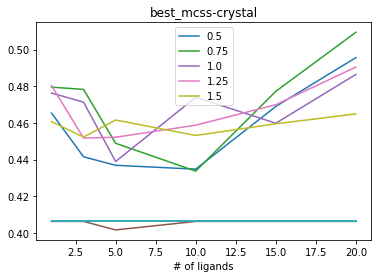

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


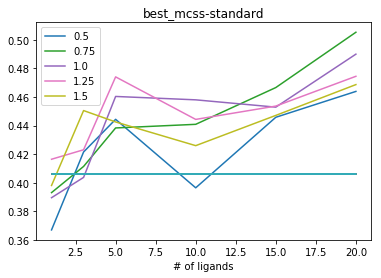

387
387
387
387
387
387
387
387
387
387
387
387
380
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


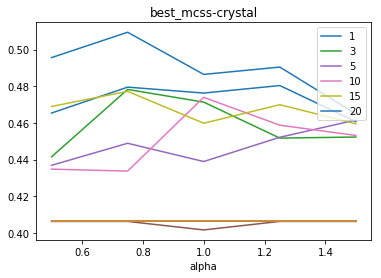

387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387
387


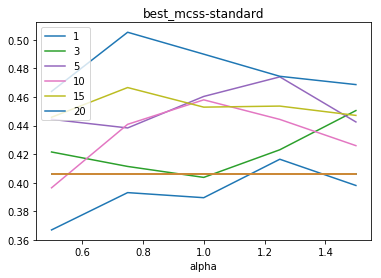

387
387
387
387
387
387
387
382
387
387
387
387


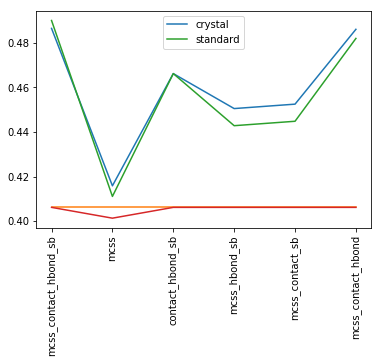

In [6]:
sweep('best_mcss', methods=['crystal', 'standard'])

284
284
284
284
284
284


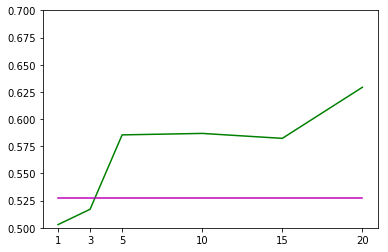

284
284
284
284
284
284


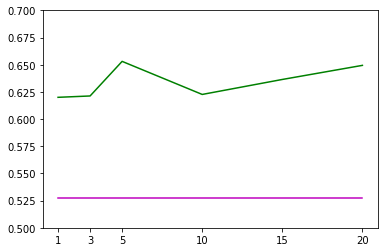

280
280
280
280
280
284


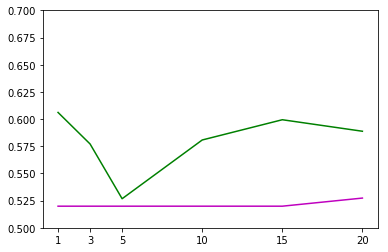

In [7]:
def sweep(helpers, save=None):
    ligs = [1, 3, 5, 10, 15, 20]
    data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
    data = add_correct(data, thresh = 2.0)
    data = data[(data.index.get_level_values('protein') != 'A2AR')]
    data = data[data.mcss < 0.5]
    data = data[data.best_correct]
    combind, glide = [], []
    for lig in ligs:
        g, c = results(data, helpers, 1.0, 'standard', 'mcss_contact_hbond_sb', lig)
        combind += [c]
        glide += [g]

    plt.plot(ligs, combind, color='green')
    plt.plot(ligs, glide, color='m')
    plt.xticks(ligs)
    plt.ylim(0.5, 0.7)
    if save:
        plt.savefig('../../../illustrator/benchmark/img/sweep-ligands-{}.pdf'.format(save))
    plt.show()
sweep('best_mcss', save='best_mcss')
sweep('best_affinity_diverse', save='best_affinity_diverse')
sweep('best_affinity', save='best_affinity')

284
284
284
284
284
279


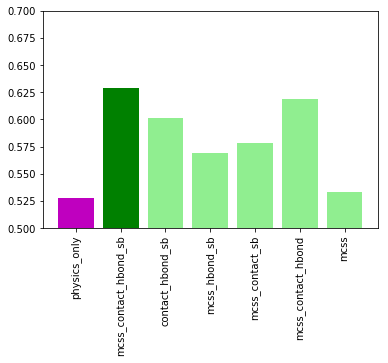

284
284
284
284
282
284


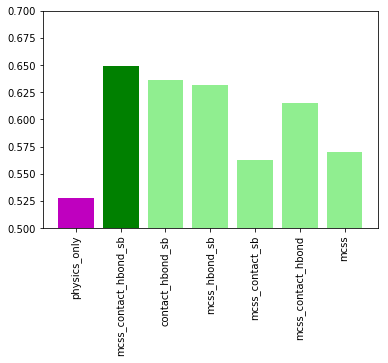

284
284
284
284
284
284


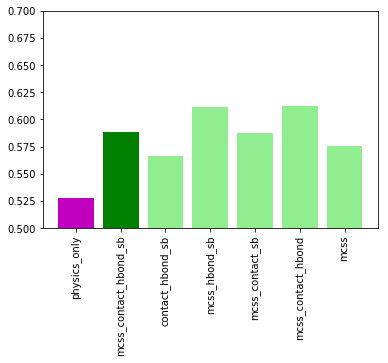

In [8]:
def sweep(helpers, save=None):
    features = ['mcss_contact_hbond_sb',
                'contact_hbond_sb', 'mcss_hbond_sb', 'mcss_contact_sb', 'mcss_contact_hbond', 'mcss',]
    data = pd.concat(load(version, helpers, mcss) for version in ['stats21'])
    data = add_correct(data, thresh = 2.0)
    data = data[(data.index.get_level_values('protein') != 'A2AR')]

    data = data[data.mcss < 0.5]
    data = data[data.best_correct]
    combind, glide = [], []
    for feature in features:
        g, c = results(data, helpers, 1.0, 'standard', feature, 20)
        combind += [c]
        glide += [g]

    plt.bar(range(len(combind)+1), glide[:1]+combind, color=['m', 'green'] + ['lightgreen']*(len(features)-1))
    plt.xticks(range(len(features)+1), ['physics_only']+ features, rotation='vertical')
    plt.ylim(0.5, 0.7)
    if save:
        plt.savefig('../../../illustrator/benchmark/img/sweep-features-{}.pdf'.format(save))
    plt.show()
sweep('best_mcss', save='best_mcss')
sweep('best_affinity_diverse', save='best_affinity_diverse')
sweep('best_affinity', save='best_affinity')